In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
%matplotlib inline

In [2]:
torch.manual_seed(1)

In [3]:
EPOCH = 10
BATCH_SIZE = 64
LR = 0.005
DOWNLOAD_MINST = False
N_TEST_IMG = 5

In [4]:
train_data = torchvision.datasets.MNIST(
    root='./mnist',
    train = True,
    transform=torchvision.transforms.ToTensor(),
    
    download=DOWNLOAD_MINST,
)

torch.Size([60000, 28, 28])
torch.Size([60000])


/Users/zhouwencheng/Desktop/Grass/02Study/02PythonEnv/1env2/lib/python3.7/site-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


4

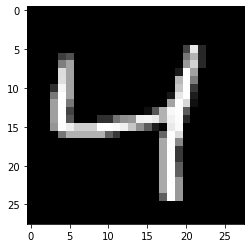

In [5]:
# plot on example
print(train_data.train_data.size())
print(train_data.targets.size())
plt.imshow(train_data.train_data[2].numpy(), cmap='gray')
# plt.title('%s', train_data.targets[2])

type(train_data.targets[2].numpy())
(train_data.targets[2].numpy()).tolist()

In [6]:
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

In [7]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 12),
            nn.Tanh(),
            nn.Linear(12, 3) ,
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.Tanh(),
            nn.Linear(12, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [8]:
autoencoder = AutoEncoder()
print(autoencoder)

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=12, bias=True)
    (5): Tanh()
    (6): Linear(in_features=12, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=12, bias=True)
    (1): Tanh()
    (2): Linear(in_features=12, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): Tanh()
    (6): Linear(in_features=128, out_features=784, bias=True)
    (7): Sigmoid()
  )
)


In [9]:
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR)
loss_func = nn.MSELoss()

view_data = Variable(train_data.train_data[:N_TEST_IMG].view(-1, 28*28).type(torch.FloatTensor)/255.)

Epoch: 0  | train loss:%.4f tensor(0.2333)


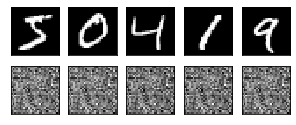

Epoch: 0  | train loss:%.4f tensor(0.0612)


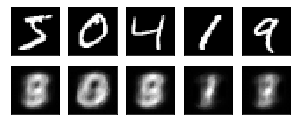

Epoch: 5  | train loss:%.4f tensor(0.0378)


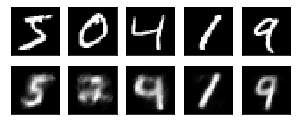

Epoch: 5  | train loss:%.4f tensor(0.0390)


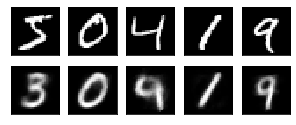

Epoch: 9  | train loss:%.4f tensor(0.0368)


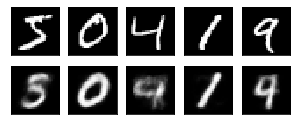

Epoch: 9  | train loss:%.4f tensor(0.0375)


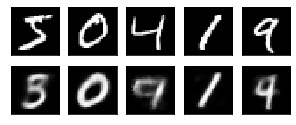

In [10]:
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):
        b_x = Variable(x.view(-1, 28*28))
        b_y = Variable(x.view(-1, 28*28))
        b_label = Variable(y)
        
        encoded, decoded = autoencoder(b_x)
        
        loss = loss_func(decoded, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step%500 == 0 and epoch in [0, 5, EPOCH-1]:
            print('Epoch:', epoch, ' | train loss:%.4f', loss.data)
            
            _, decoded_data = autoencoder(view_data)
            
            f, a = plt.subplots(2, N_TEST_IMG, figsize = (5, 2))
            
            for i in range(N_TEST_IMG):
                a[0][i].imshow(np.reshape(view_data.data.numpy()[i], (28, 28)), cmap='gray'); a[0][i].set_xticks(()); a[0][i].set_yticks(())
    
            for i in range(N_TEST_IMG):
                a[1][i].clear()
                a[1][i].imshow(np.reshape(decoded_data.data.numpy()[i], (28, 28)), cmap='gray')
                a[1][i].set_xticks(()); a[1][i].set_yticks(())
            plt.show(); plt.pause(0.05)

(-2.0900712, 2.8626688)

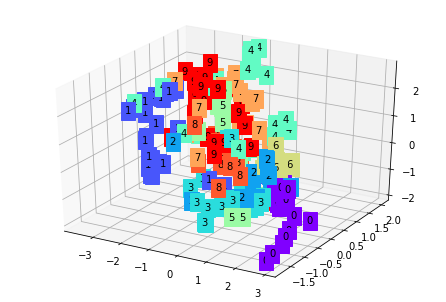

In [25]:
# visualize in 3D plot

num_of_data = 200

view_data = Variable(train_data.train_data[:num_of_data].view(-1, 28*28).type(torch.FloatTensor)/255.)
encoded_data, _ = autoencoder(view_data)
fig = plt.figure(2)
ax = Axes3D(fig) 
X, Y, Z = encoded_data.data[: , 0].numpy(), encoded_data.data[: , 1].numpy(), encoded_data.data[: , 2].numpy(), 
values = train_data.targets[:num_of_data].numpy()
for x, y, z, s in zip(X, Y, Z, values):
    c = cm.rainbow(int(255*s/9))
    ax.text(x, y, z, s, backgroundcolor = c)
ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_zlim(Z.min(), Z.max())